In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/image_classification/train",
    labels = "inferred",
    label_mode = "categorical",
    class_names = None,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (64, 64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = "bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False,
)

Found 3115 files belonging to 36 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/image_classification/validation",
    labels = "inferred",
    label_mode = "categorical",
    class_names = None,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (64, 64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = "bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False,
)

Found 351 files belonging to 36 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3,activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=36, activation='softmax'))

In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           4,644 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,649,124 (6.29 MB)

 Trainable params: 1,649,124 (6.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=30)

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 574s 6s/step - accuracy: 0.0391 - loss: 20.5133 - val_accuracy: 0.1282 - val_loss: 3.4117
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 116s 683ms/step - accuracy: 0.0728 - loss: 3.6215 - val_accuracy: 0.1624 - val_loss: 3.1753
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 69s 702ms/step - accuracy: 0.1249 - loss: 3.6463 - val_accuracy: 0.3305 - val_loss: 2.9460
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 705ms/step - accuracy: 0.1743 - loss: 3.8595 - val_accuracy: 0.2593 - val_loss: 3.0503
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 705ms/step - accuracy: 0.2512 - loss: 2.9576 - val_accuracy: 0.4274 - val_loss: 2.2625
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 74s 762ms/step - accuracy: 0.3213 - loss: 2.7058 - val_accuracy: 0.2336 - val_loss: 4.7105
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 77s 707ms/step - accuracy: 0.3970 - loss: 2.6461 - val_accuracy: 0.5242 - val_loss: 2.0361
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 69s 699ms/step - accuracy: 0.4401 - loss: 2.2569 - val_accu

In [ ]:
cnn.save('trained_model.h5')

In [ ]:
training_history.history

{'accuracy': [0.04012840986251831,
  0.08250401169061661,
  0.13033707439899445,
  0.17688603699207306,
  0.25008025765419006,
  0.30690208077430725,
  0.38812199234962463,
  0.4394863545894623,
  0.48507222533226013,
  0.550561785697937,
  0.6051364541053772,
  0.6202247142791748,
  0.644622802734375,
  0.679614782333374,
  0.6802568435668945,
  0.7171749472618103,
  0.736115574836731,
  0.7467094659805298,
  0.7762439846992493,
  0.7637239098548889,
  0.8089887499809265,
  0.8138041496276855,
  0.8234350085258484,
  0.8176565170288086,
  0.8346709609031677,
  0.8343499302864075,
  0.8487961292266846,
  0.8568218350410461,
  0.8565008044242859,
  0.8690208792686462],
 'loss': [7.901875972747803,
  3.5799858570098877,
  3.50935959815979,
  3.8768727779388428,
  3.0415334701538086,
  3.2401111125946045,
  2.5683913230895996,
  2.2737016677856445,
  2.3204078674316406,
  2.0289363861083984,
  1.8405845165252686,
  1.850907325744629,
  2.2328684329986572,
  1.4668256044387817,
  1.7449326

In [ ]:
import json
with open('training_history.json', 'w') as f:
    json.dump(training_history.history, f)

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
print(f"Validation set accuracy: {training_history.history['val_accuracy'][-1] * 100}")

Validation set accuracy: 87.7492904663086


Text(0.5, 1.0, 'Graph for Training Accuracy')

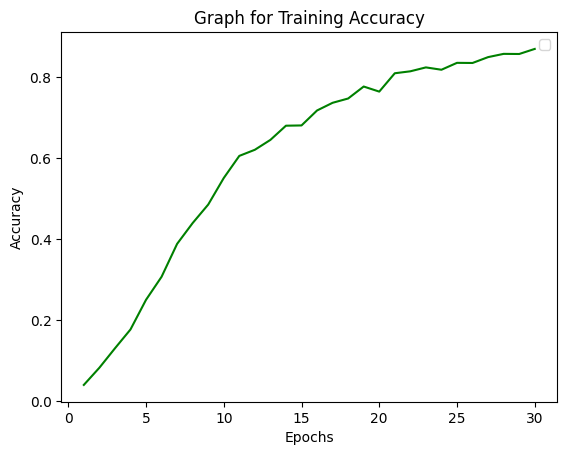

In [ ]:
epochs = [i for i in range(1, 31)]
plt.plot(epochs, training_history.history['accuracy'], color = "green")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Graph for Training Accuracy')

Text(0.5, 1.0, 'Graph for Training Loss')

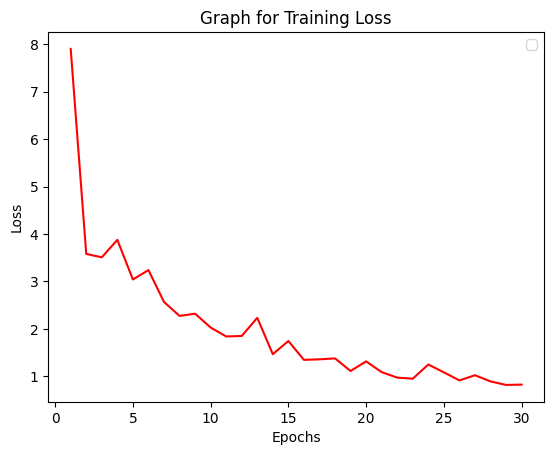

In [ ]:
plt.plot(epochs, training_history.history['loss'], color = "red")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Graph for Training Loss')

Text(0.5, 1.0, 'Graph for Validation Accuracy')

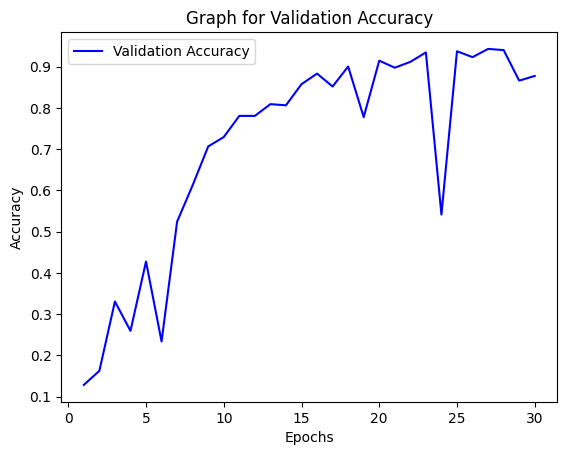

In [ ]:
plt.plot(epochs, training_history.history['val_accuracy'], label='Validation Accuracy', color = "blue")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Graph for Validation Accuracy')